<a href="https://colab.research.google.com/github/RamezNabil/Breast-Cancer-Classification/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
%matplotlib inline
%tensorflow_version 2.x

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 80
pd.options.display.float_format = "{:.1f}".format

Getting the Dataset (Downloaded locally Uploaded to colab instance from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

In [40]:
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,18.0,10.4,122.8,1001.0,0.1,0.3,0.3,0.1,0.2,0.1,1.1,0.9,8.6,153.4,0.0,0.0,0.1,0.0,0.0,0.0,25.4,17.3,184.6,2019.0,0.2,0.7,0.7,0.3,0.5,0.1
1,842517,M,20.6,17.8,132.9,1326.0,0.1,0.1,0.1,0.1,0.2,0.1,0.5,0.7,3.4,74.1,0.0,0.0,0.0,0.0,0.0,0.0,25.0,23.4,158.8,1956.0,0.1,0.2,0.2,0.2,0.3,0.1
2,84300903,M,19.7,21.2,130.0,1203.0,0.1,0.2,0.2,0.1,0.2,0.1,0.7,0.8,4.6,94.0,0.0,0.0,0.0,0.0,0.0,0.0,23.6,25.5,152.5,1709.0,0.1,0.4,0.5,0.2,0.4,0.1
3,84348301,M,11.4,20.4,77.6,386.1,0.1,0.3,0.2,0.1,0.3,0.1,0.5,1.2,3.4,27.2,0.0,0.1,0.1,0.0,0.1,0.0,14.9,26.5,98.9,567.7,0.2,0.9,0.7,0.3,0.7,0.2
4,84358402,M,20.3,14.3,135.1,1297.0,0.1,0.1,0.2,0.1,0.2,0.1,0.8,0.8,5.4,94.4,0.0,0.0,0.1,0.0,0.0,0.0,22.5,16.7,152.2,1575.0,0.1,0.2,0.4,0.2,0.2,0.1


Visualization

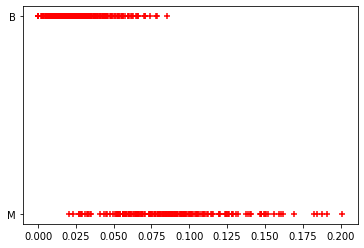

In [41]:
plt.scatter(df.concave_points_mean, df.diagnosis, marker='+', color='red')

Training and Test Data

In [42]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['diagnosis'])
y = df.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Pre-Processing

In [43]:
X_train_norm = (X_train - X_train.mean())/X_train.std()
X_test_norm = (X_test - X_test.mean())/X_test.std()

y_train.replace('B', 0, inplace=True)
y_train.replace('M', 1, inplace=True)
y_test.replace('B', 0, inplace=True)
y_test.replace('M', 1, inplace=True)

Feature Columns

In [44]:
feature_columns = []
excluded_columns = ['id']
for col in X.columns:
  if col not in excluded_columns:
    feature_columns.append(tf.feature_column.numeric_column(col))

feature_layer = layers.DenseFeatures(feature_columns)
feature_layer(dict(X_train_norm))

<tf.Tensor: shape=(381, 30), dtype=float32, numpy=
array([[ 0.06746783, -0.46839762, -0.14196023, ..., -0.87581503,
        -1.3097794 , -1.0405228 ],
       [-0.5649805 , -0.5042411 , -0.6018944 , ..., -0.78627574,
        -0.68475807, -0.9949588 ],
       [-0.5801616 , -0.49849695, -0.46488148, ..., -0.2995491 ,
        -0.78969675, -0.27081695],
       ...,
       [-0.42605957, -0.5428418 , -0.43111193, ..., -0.781684  ,
        -0.8033443 , -0.63207424],
       [-0.7113488 , -0.56329095, -0.6620464 , ..., -1.4888151 ,
        -1.2313981 , -1.3903891 ],
       [-0.41947156,  0.02238265, -0.42759427, ...,  0.4695708 ,
         1.0903467 ,  0.2124867 ]], dtype=float32)>

Logistic Regression Functions and Plotting Function

In [45]:
def create_model(my_learning_rate, feature_layer, my_metrics):
  """Create and compile a simple classification model."""
  model = tf.keras.models.Sequential()
  model.add(feature_layer)
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,), activation=tf.sigmoid))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = my_learning_rate),                                                   
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model        


def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
  """Feed a dataset into the model in order to train it."""
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size, epochs=epochs, shuffle=shuffle)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist  

def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")
  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)
  plt.legend()


Adjusting hyperparameters and fitting the model

Epoch 1/20
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
4/4 [==============================] - 1s 4ms/step - loss: 0.6551 - accuracy: 0.5118
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 0.4013 - accuracy: 0.8005
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3139 - accuracy: 0.8819
Epoch 4/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2607 - accuracy: 0.9108
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2249 - accuracy: 0.9291
Epoch 6/20
4/4 [==============================] - 0s 5ms/step - loss: 0.1989 - accuracy: 0.9423
Epoch 7/20
4/4 [==============================] - 0s 7ms/step - loss: 0.1769 - accuracy: 0.9501
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1607 - accuracy: 0.9554
Epoch 9/20
4/4 [==============================] - 0s 3ms/step - loss: 0.1470 - accuracy: 0.9606
Epoch 10/20
4/4 [=========

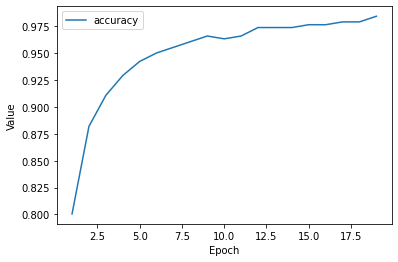

In [46]:
learning_rate = 0.010
epochs = 20
batch_size = 100
label_name = "diagnosis"
classification_threshold = 0.35

METRICS = [tf.keras.metrics.BinaryAccuracy(name='accuracy', threshold=classification_threshold)]
my_model = create_model(learning_rate, feature_layer, METRICS)

epochs, hist = train_model(my_model, pd.concat([X_train_norm, y_train], axis=1), epochs, 
                           label_name, batch_size)

list_of_metrics_to_plot = ['accuracy'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)

Test dataset Evaluation

In [47]:
features = {name:np.array(value) for name, value in pd.concat([X_test_norm, y_test], axis=1).items()}
label = np.array(features.pop(label_name))

my_model.evaluate(x = features, y = label, batch_size=batch_size)

Consider rewriting this model with the Functional API.
2/2 [==============================] - 0s 7ms/step - loss: 0.0845 - accuracy: 0.9787


[0.08448176831007004, 0.978723406791687]